In [1]:
import sys     ###motion_test_header
sys.path.append('../scripts/')
from robot import *

<IPython.core.display.Javascript object>


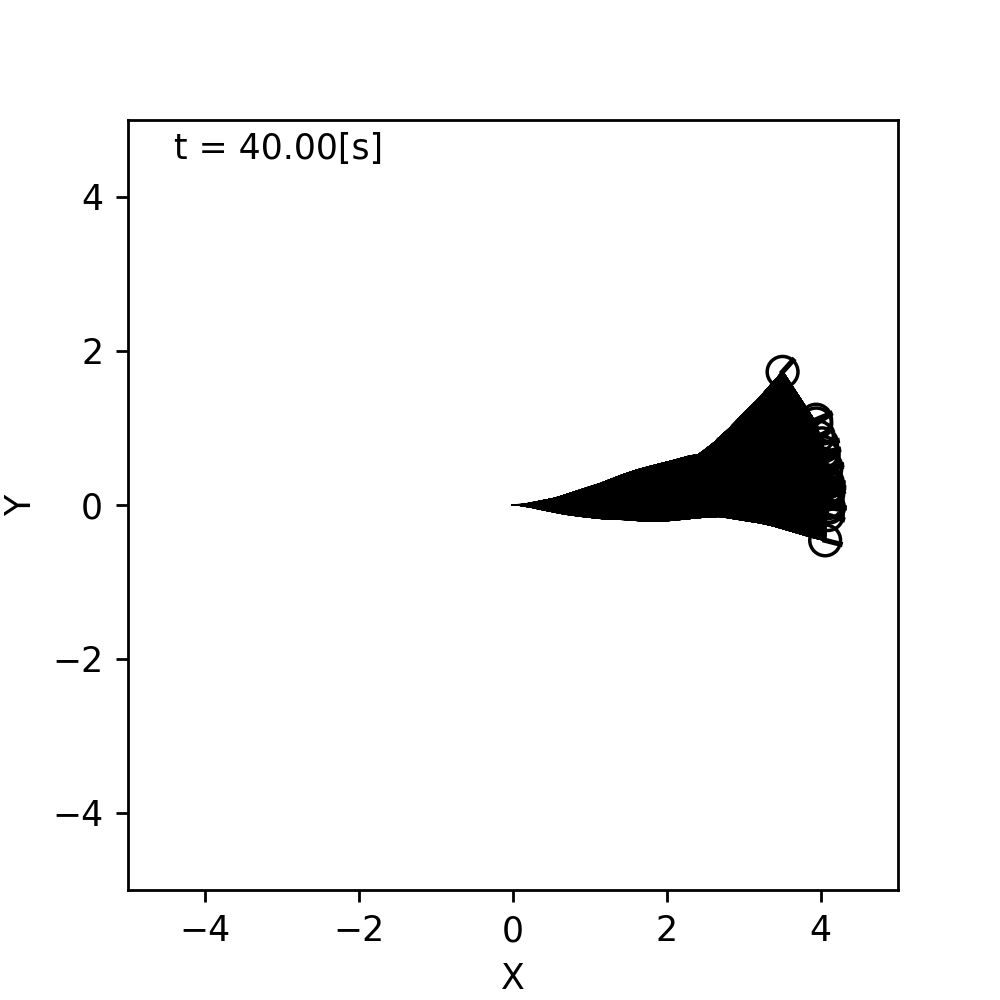

In [2]:
import copy    ###motion_test_linear

world = World(40.0, 0.1)  

initial_pose = np.array([0, 0, 0]).T
robots = []
r = Robot(initial_pose, sensor=None, agent=Agent(0.1, 0.0)) 

for i in range(20):
    copy_r = copy.copy(r)
    copy_r.distance_until_noise = copy_r.noise_pdf.rvs() #最初に雑音が発生するタイミングを変える
    world.append(copy_r)     #worldに登録することでアニメーションの際に動く
    robots.append(copy_r)   #オブジェクトの参照のリストにロボットのオブジェクトを登録

world.draw()

In [3]:
import pandas as pd ###motion_test_stats
poses = pd.DataFrame([ [math.sqrt(r.pose[0]**2 + r.pose[1]**2), r.pose[2]] for r in robots], 
                     columns=['r', 'theta'])
poses.transpose() #縦横を入れ替えて表示

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
r,4.100114,4.116321,4.074918,4.044974,4.094357,3.920159,4.112606,4.106120,4.096410,4.092947,4.109438,4.107457,4.103538,4.105480,4.115140,4.108646,4.118435,4.064544,4.119757,4.106880
theta,0.360150,0.132811,0.415829,0.514336,0.571855,0.840571,0.179529,0.178095,-0.246844,0.170753,0.167711,0.045488,-0.185048,0.400257,-0.025208,0.198076,-0.021443,0.487636,-0.020304,-0.285054


In [4]:
print(poses["theta"].var()) ###motion_test_sigma_omeganu
print(poses["r"].mean())
math.sqrt(poses["theta"].var()/poses["r"].mean())

0.08444419407573728
4.090912127694664


0.1436728881327213